# Fiber models - comparison of responses to remote sonication by planar circular transducer

- SD curve myelinated for different frequencies at default distance and diameter
- SD curve unmyelinated for different frequencies at default distance and diameter
- SD curve myelinated for different diameters at default distance and frequency
- SD curve unmyelinated for different diameters at default distance and frequency
- SD curve myelinated for different distances at default diameter and frequency
- SD curve unmyelinated for different distances at default diameter and frequency
- conclusion about influence of myelination, fiber diameter, US frequency and source distance on excitability
- Identify potential features that could be interesting for experimental validation.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
#from scipy.interpolate import interp1d

from PySONIC.utils import logger, si_format
#from PySONIC.neurons import getPointNeuron
from ExSONIC.core import PlanarDiskTransducerSource, SonicFiber, myelinatedFiberReilly, unmyelinatedFiberSundt, strengthDuration
from ExSONIC.plt import strengthDurationCurve, strengthDistanceCurve

#Folder used to store the strength duration data
outdir='strengthDurationData'
logger.setLevel(logging.WARNING)

## Acoustic propagation from a planar transducer

-> ref 2D field for different frequencies 

## Acoustic stimulation parameters

In [2]:
# Stimulation parameters
fiberClass = 'acoustic_planar_transducer'
toffset = 20e-3  # s
n_dur = 40
tstim_range = np.logspace(-5, -2, n_dur)  # s

# Myelinated fiber

In [3]:
# Fiber parameters
fiberType = 'reilly'

#Default parameters
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 10e-3         #(m)

## SD curve varying the diameter

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD20.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}


<IPython.core.display.Javascript object>


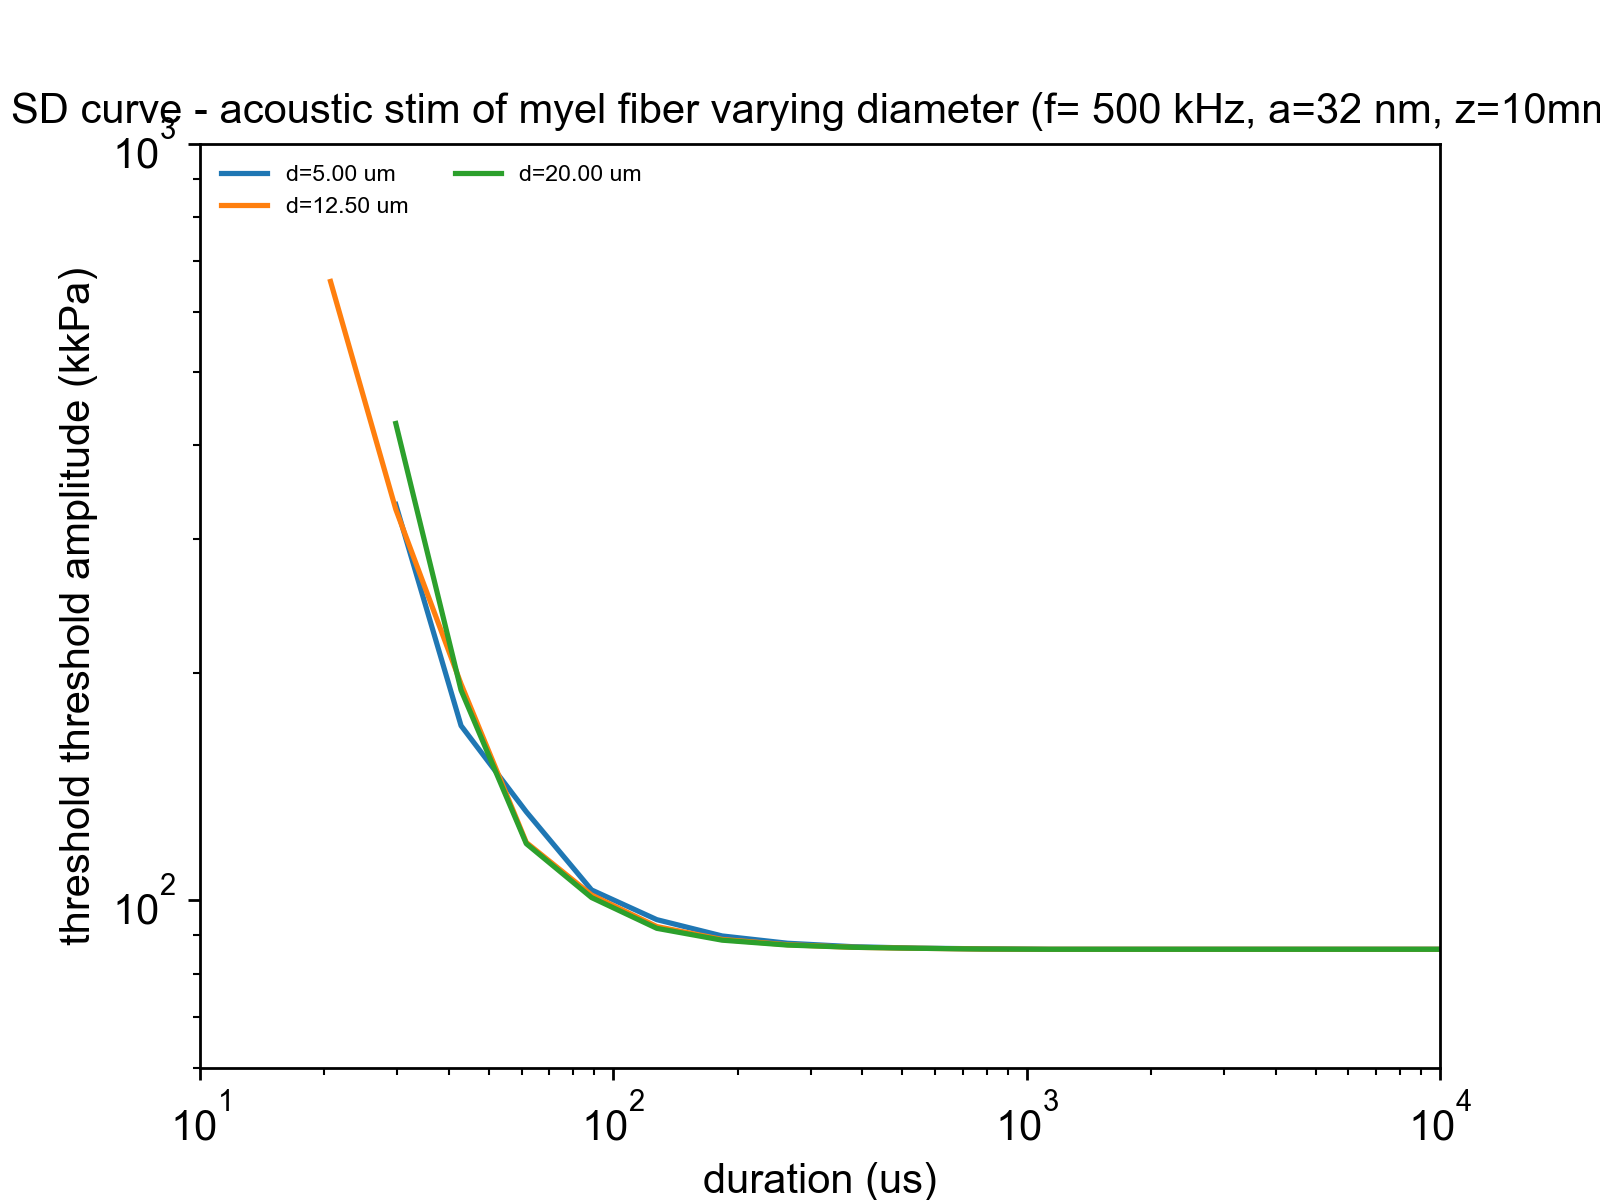

In [5]:
# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, source distance = 10 mm
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)   #(m)
diam_range = np.linspace(5e-6, 20e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'd={(fiberD*1e6):.2f} um'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stim of myel fiber varying diameter (f= 500 kHz, a=32 nm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6])

## SD curve varying the frequency

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '1000kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.69mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '2000kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource1.88mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '4000kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource4.25mm', 'tstim_range': 'tstim10.0um-10.0mm'}


<IPython.core.display.Javascript object>


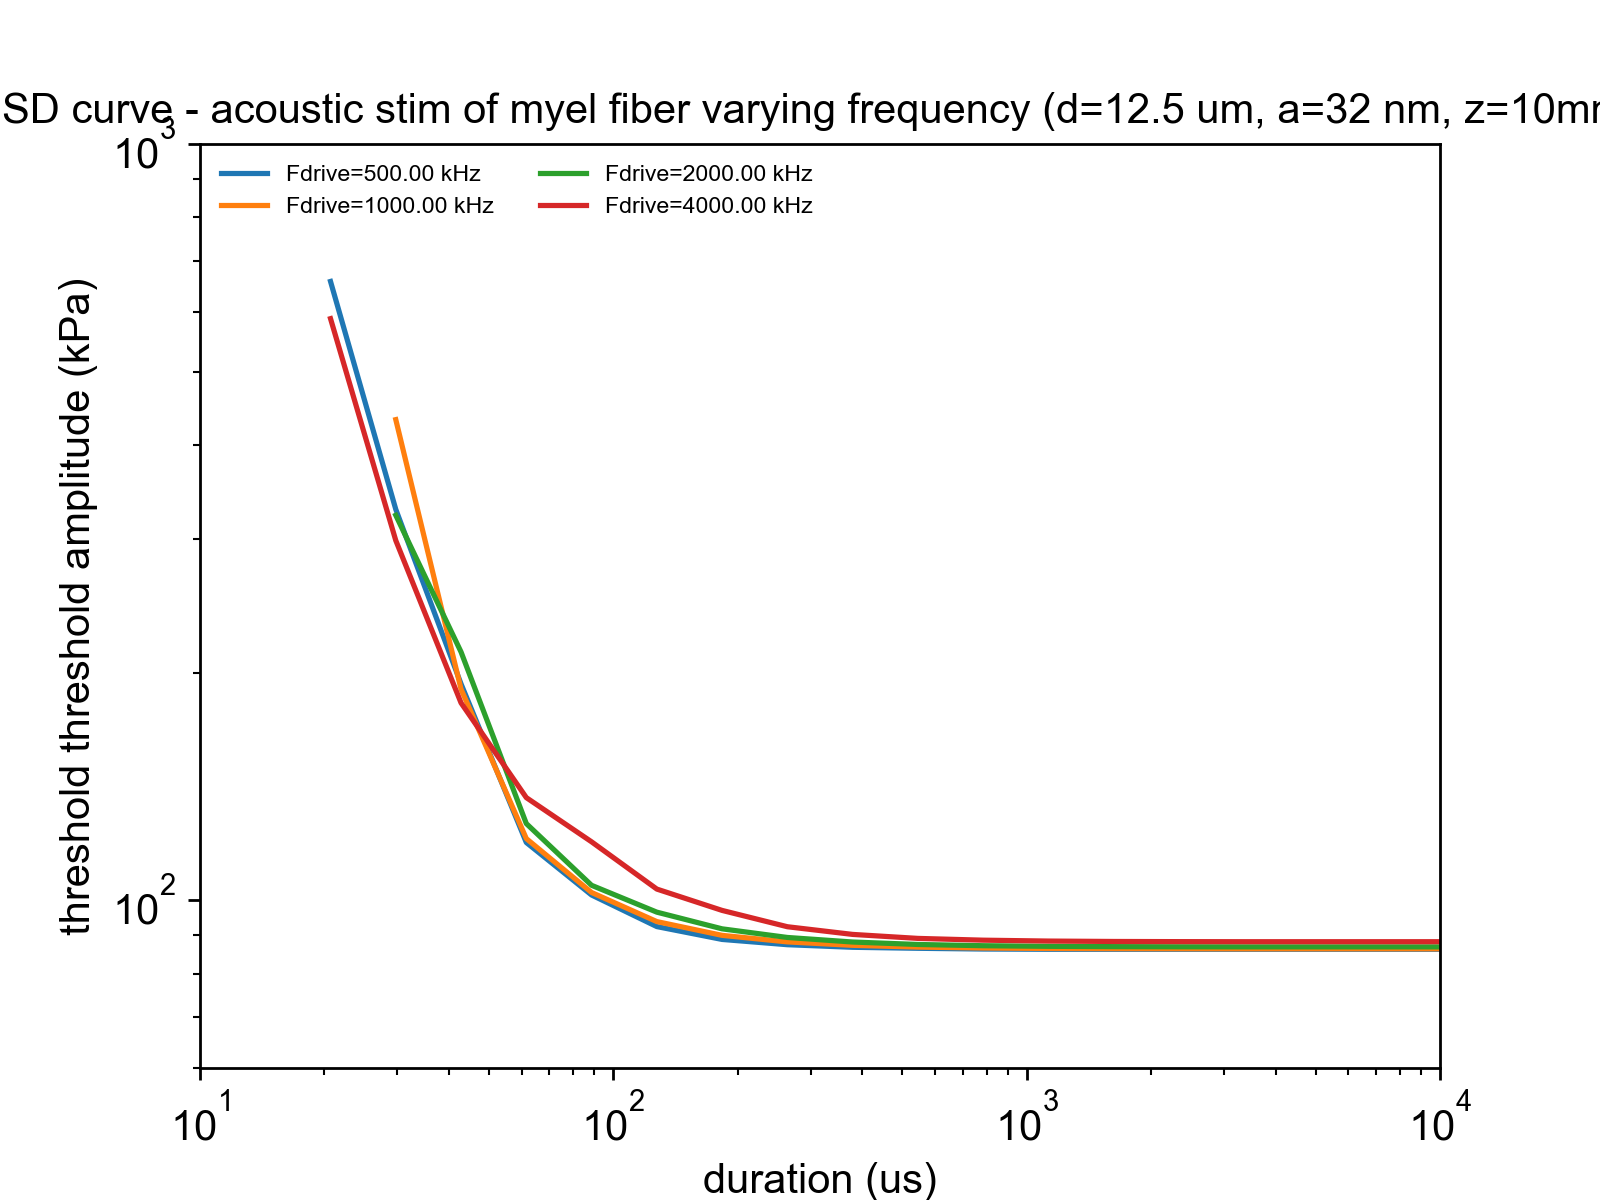

In [7]:
# Parameters fixed: 
# fiber diameter 12.5 um, sonophore diameter 32 nm, source distance = 10 mm
# Stimulation frequency studied in the interval 20-4000 kHz
fiberD = 12.5e-6  #(m)
a = 32e-9         #(m)
freq_range = [500e3, 1000e3, 2000e3, 4000e3]
# 300 kHz no excitation with this titration interval
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, freq in enumerate(freq_range): 
    z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'Fdrive={(freq*1e-3):.2f} kHz'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stim of myel fiber varying frequency (d=12.5 um, a=32 nm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False,limits=[6e4, 1e6])

## SD curve varying the sonophore diameter

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '16nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '20nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '24nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '48nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '64nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}


<IPython.core.display.Javascript object>


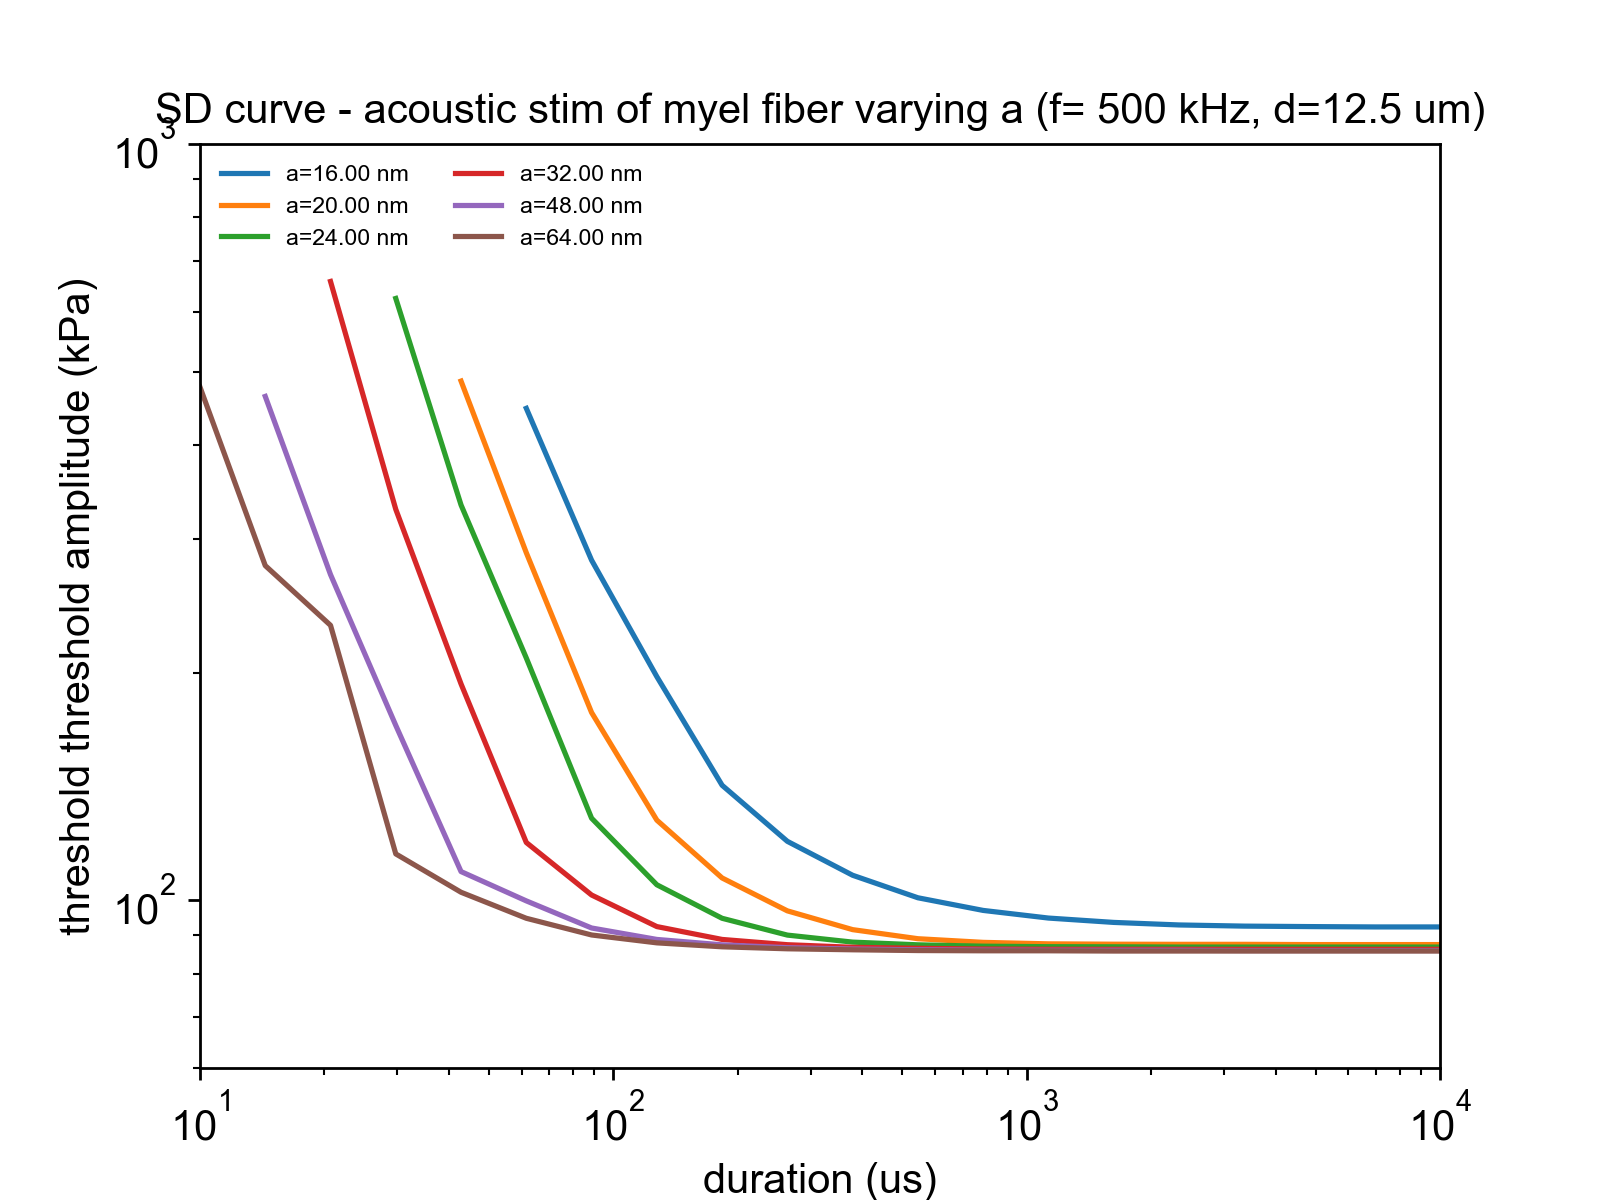

In [9]:
# Parameters fixed: 
# fiber diameter 12.5 um, stimulation frequency 500 kHz, source distance = 10 mm
# Sonophore diameter studied in the interval 16-64 nm
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)        #(m)
a_range = [16e-9, 20e-9, 24e-9, 32e-9, 48e-9, 64e-9]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'a={(a*1e9):.2f} nm'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stim of myel fiber varying a (f= 500 kHz, d=12.5 um)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6])

# Comparison to the single node acoustic stimulation

## SD curve varying the diameter

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'tstim_range': 'tstim10.0um-10.

<IPython.core.display.Javascript object>


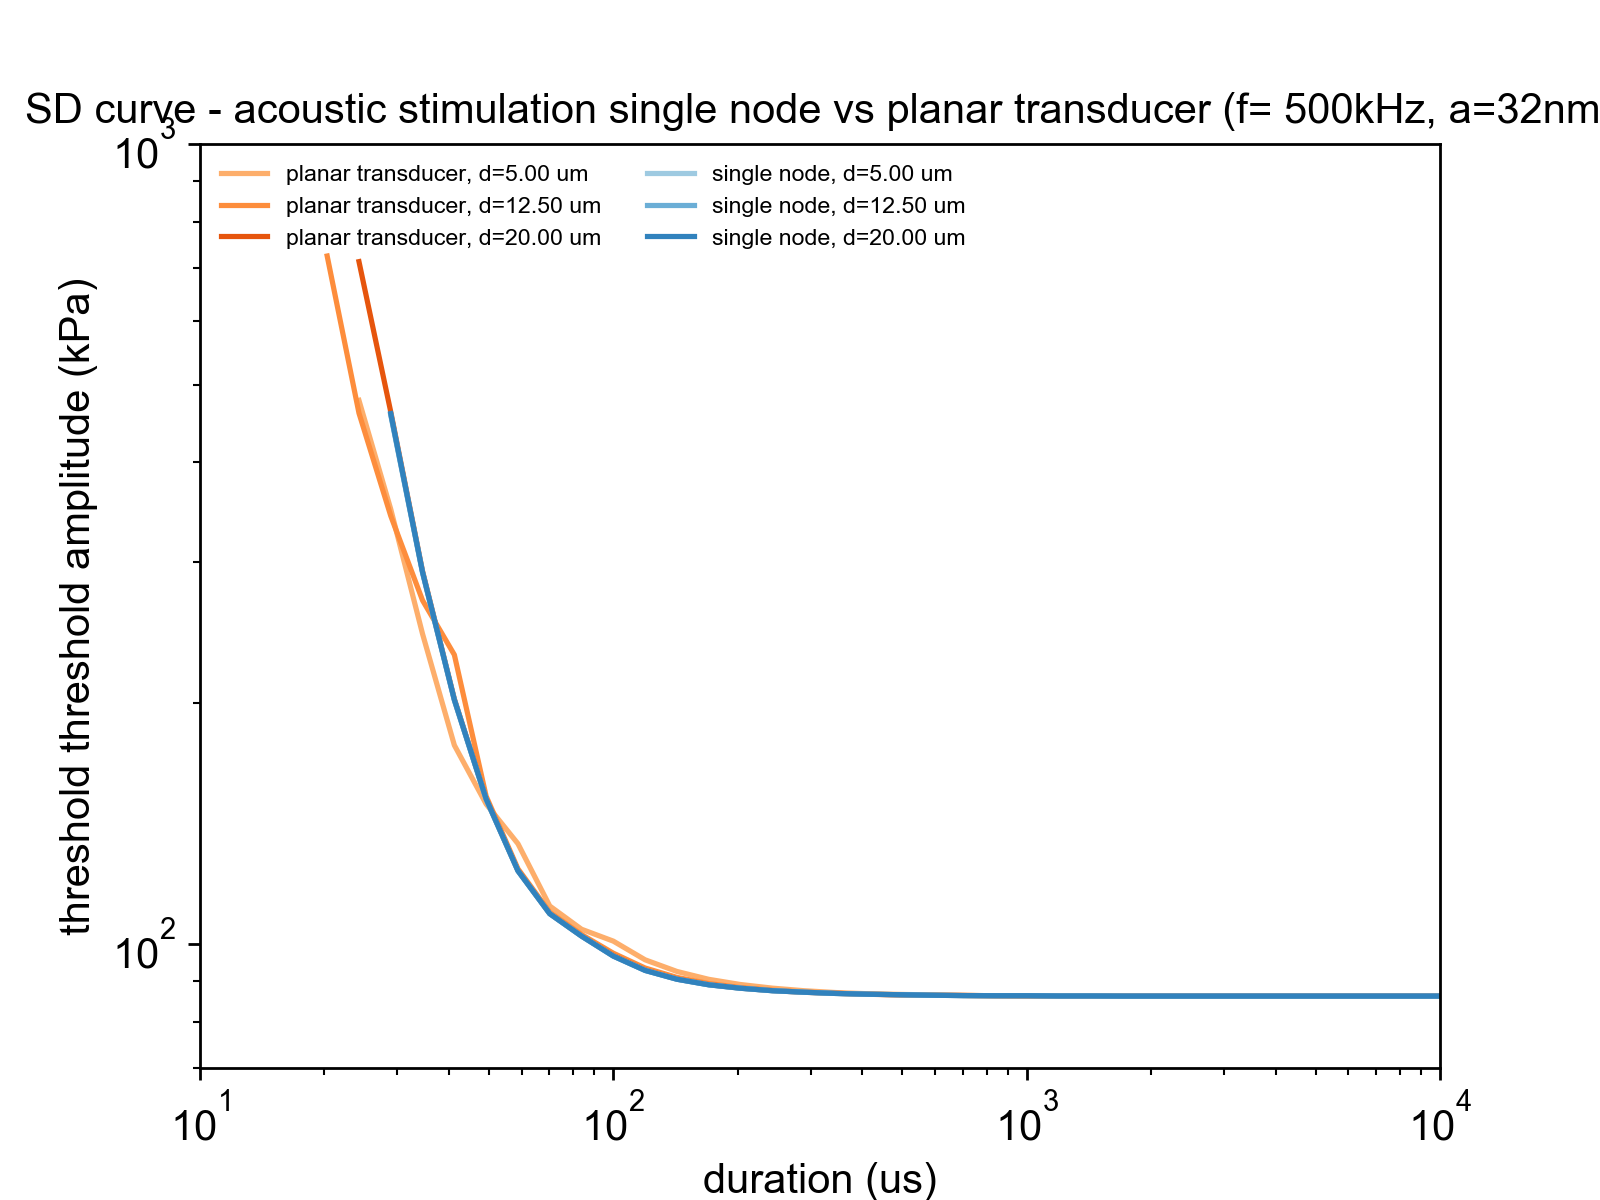

In [8]:
# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, source distance = 10 mm
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)   #(m)
diam_range = np.linspace(5e-6, 20e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, d={(fiberD*1e6):.2f} um'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, d={(fiberD*1e6):.2f} um'] = Athr    
    
# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stimulation single node vs planar transducer (f= 500kHz, a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[7e4, 1e6], colors=colors)

## SD curve varying the frequency

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '1000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.69mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '4000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource4.25mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '1000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '4000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0

<IPython.core.display.Javascript object>


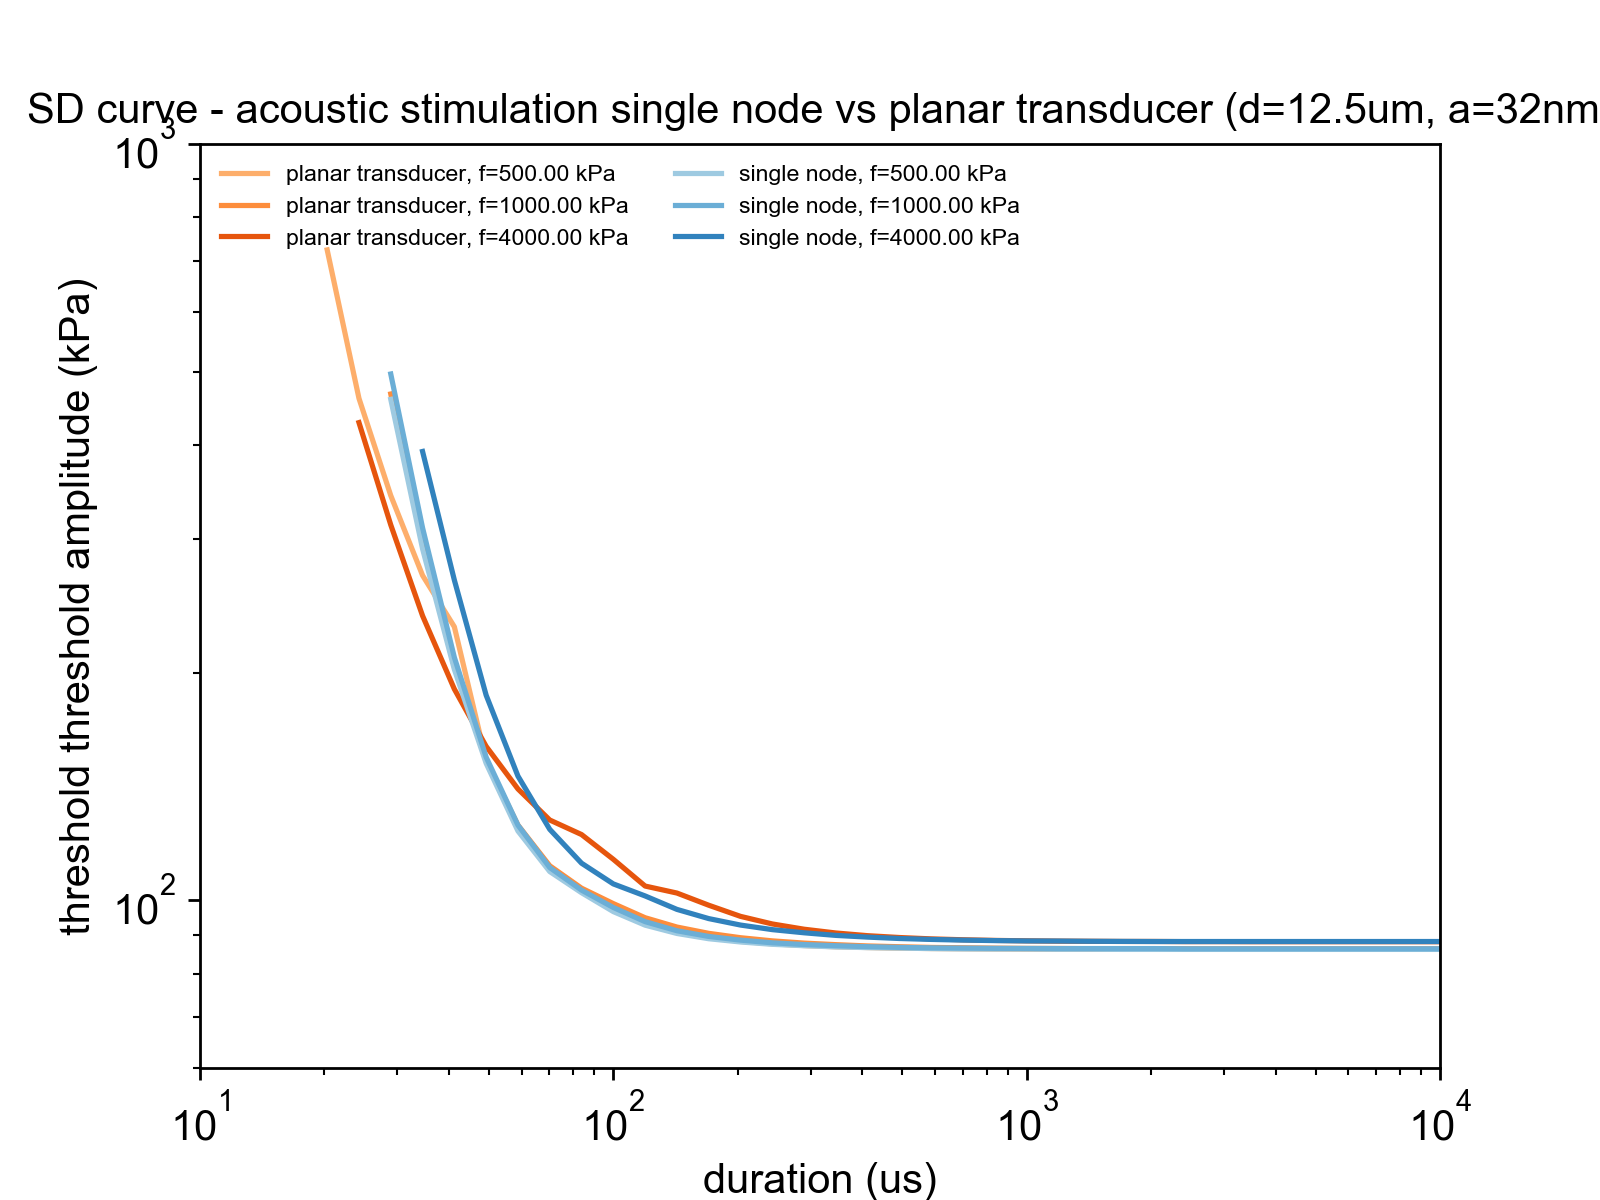

In [9]:
# Parameters fixed: 
# fiber diameter 12.5 um, sonophore diameter 32 nm, source distance = 10 mm
# Stimulation frequency studied in the interval 20-4000 kHz
fiberD = 12.5e-6  #(m)
a = 32e-9         #(m)
freq_range = [500e3, 1000e3, 4000e3]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, freq in enumerate(freq_range): 
    z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, f={(freq*1e-3):.2f} kPa'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, freq in enumerate(freq_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, f={(freq*1e-3):.2f} kPa'] = Athr    
    
# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stimulation single node vs planar transducer (d=12.5um, a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6], colors=colors)

## SD curve varying the sonophore diameter

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '16nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '64nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '16nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '64nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-1

<IPython.core.display.Javascript object>


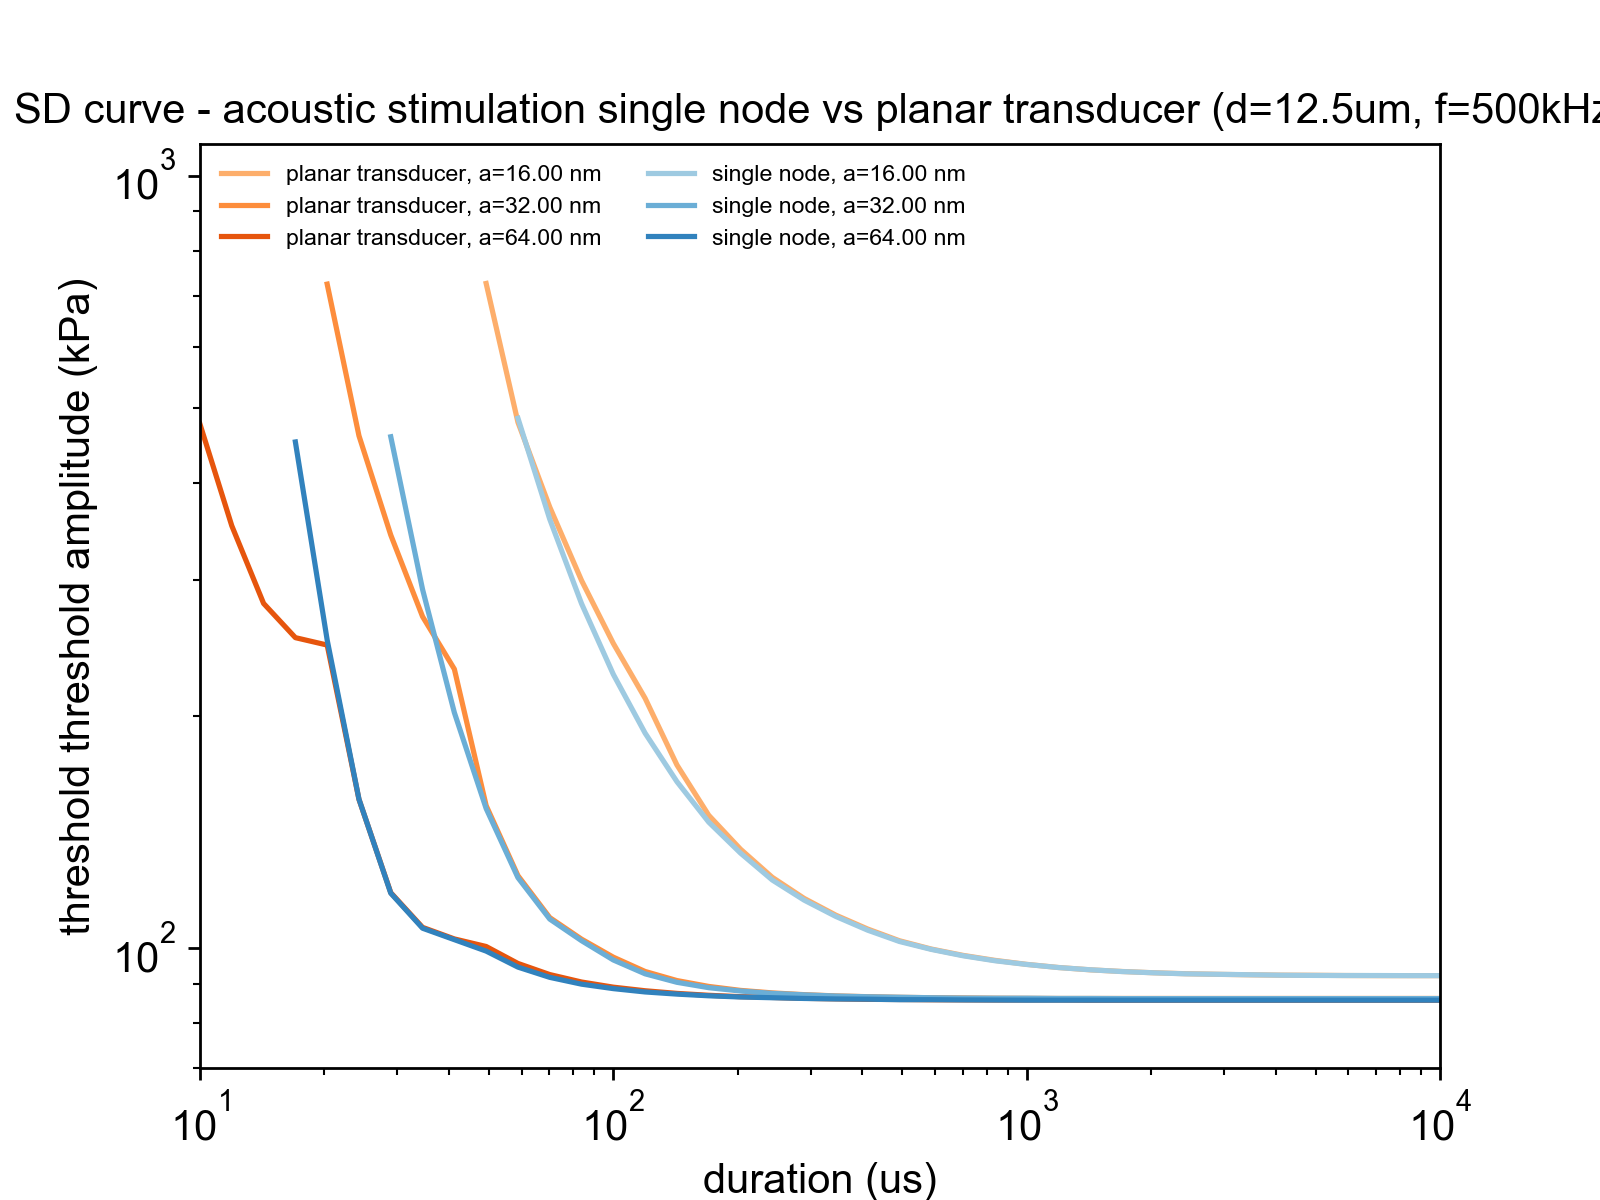

In [13]:
# Parameters fixed: 
# fiber diameter 12.5 um, stimulation frequency 500 kHz, source distance = 10 mm
# Sonophore diameter studied in the interval 16-64 nm
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)        #(m)
a_range = [16e-9, 32e-9, 64e-9]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, a={(a*1e9):.2f} nm'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, a={(a*1e9):.2f} nm'] = Athr    
    
# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stimulation single node vs planar transducer (d=12.5um, f=500kHz)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, colors=colors, limits=[7e4, 1.1e6])

# Unmyelinated fiber

In [21]:
# Fiber parameters
fiberType = 'sundt'

#Default parameters
fiberD = 0.85e-6  #(m)
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 10e-3         #(m)

## SD curve varying the diameter

In [24]:
# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, source distance = 10 mm
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 10e-3         #(m)
diam_range = np.linspace(0.2e-6, 1.5e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'd={(fiberD*1e6):.2f} um'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stim of myel fiber varying diameter (f= 500 kHz, a=32 nm, z=10mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1, yunit='m/s',
    scale='log', plot_chr=False)

{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD0.20um', 'zsource': 'zsource10.00mm', 'tstim_range': 'tstim10.0um-10.0mm'}
CVode 0x7fe22f2eddf0 SonicFiber(FH neuron, a = 32.0 nm, 21 nodes, rs = 110 Ohm.cm, nodeD = 8.8 um, nodeL = 2.5 um, interD = 8.8 um, interL = 1.2 mm).node0 advance_tn failed, err=-7.


NEURON: variable step integrator error
 near line 0
 ^
        fadvance()


RuntimeError: hoc error

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource10.00mm', 'tstim_range': 'tstim10.0um-10.0mm'}


 22/01/2020 16:44:16: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:16: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:17: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:17: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:18: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:18: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:19: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:44:19: No threshold found within the [3.13e-07 - 3.13e-01] interval


{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource10.00mm', 'tstim_range': 'tstim10.0um-10.0mm'}


 22/01/2020 16:50:09: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:10: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:11: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:11: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:12: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:13: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:13: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:50:14: No threshold found within the [3.13e-07 - 3.13e-01] interval


{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'zsource': 'zsource10.00mm', 'tstim_range': 'tstim10.0um-10.0mm'}


 22/01/2020 16:53:48: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:48: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:49: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:50: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:50: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:51: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:51: No threshold found within the [3.13e-07 - 3.13e-01] interval
 22/01/2020 16:53:52: No threshold found within the [3.13e-07 - 3.13e-01] interval


{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'tstim_range': 'tstim10.0um-10.0mm'}


<IPython.core.display.Javascript object>


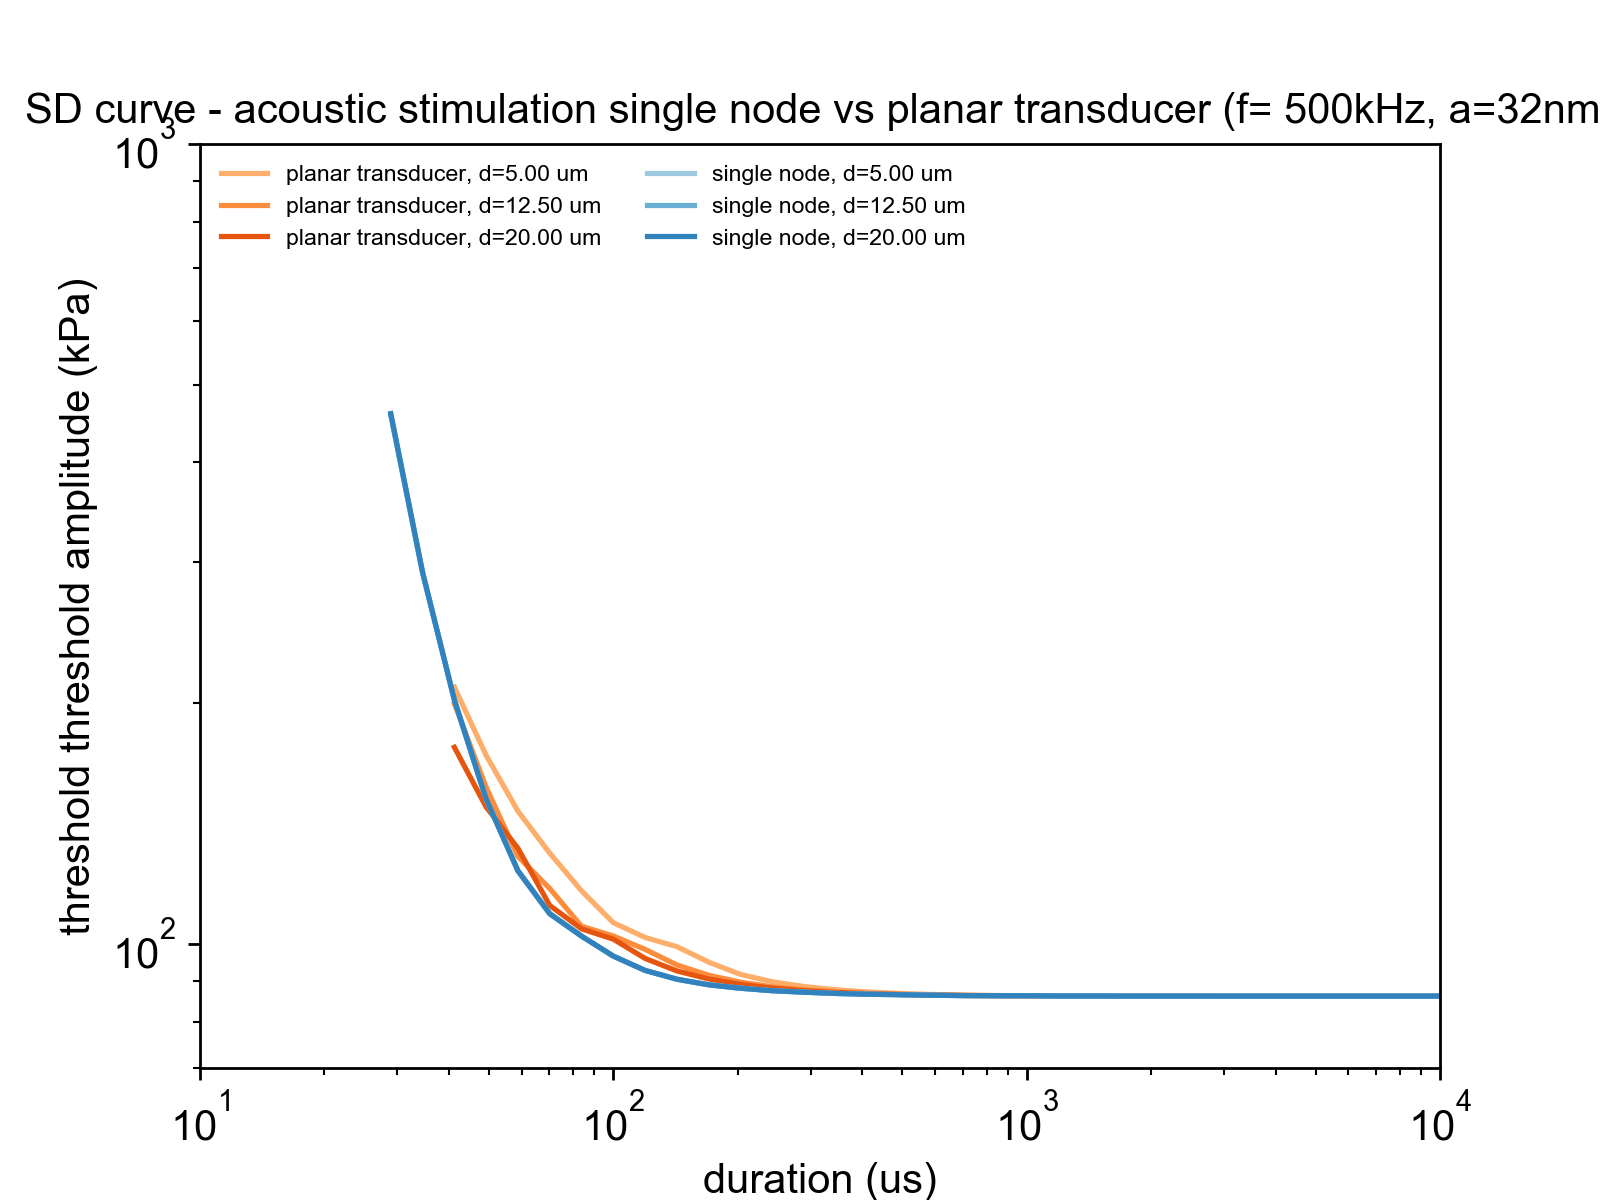

In [14]:
# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, source distance = 10 mm
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 1e-2   #(m)
diam_range = np.linspace(5e-6, 20e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, d={(fiberD*1e6):.2f} um'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, d={(fiberD*1e6):.2f} um'] = Athr    
    
# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stimulation single node vs planar transducer (f= 500kHz, a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[7e4, 1e6], colors=colors)